In [3]:
import pandas as pd
import numpy as np

Clustered dataset saved to clustered_water_leakage_with_labels.csv
Cluster 1:
  Number of Points: 50
  Average Pressure: 4.80
  Average Elevation: 4.93
  Predominant Region Type: Suburban Low Pressure

Cluster 2:
  Number of Points: 50
  Average Pressure: 14.90
  Average Elevation: 5.21
  Predominant Region Type: Industrial High Pressure

Cluster 3:
  Number of Points: 50
  Average Pressure: 10.19
  Average Elevation: 15.00
  Predominant Region Type: Elevated Medium Pressure



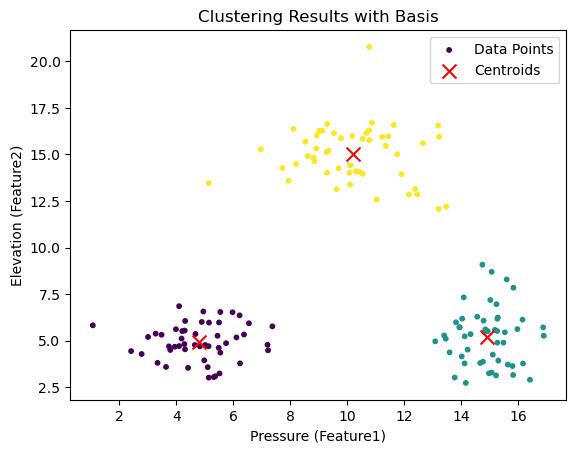

In [11]:
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("synthetic_water_leakage_with_labels.csv")

# Extract features and labels
data = df[["Pressure", "Elevation"]].values
labels = df["Region_Type"].values

# K-Means clustering algorithm without built-in functions
def initialize_centroids(data, k):
    indices = np.random.choice(data.shape[0], k, replace=False)
    return data[indices]

def assign_clusters(data, centroids):
    clusters = []
    for point in data:
        distances = [np.linalg.norm(point - centroid) for centroid in centroids]
        clusters.append(np.argmin(distances))
    return np.array(clusters)

def update_centroids(data, clusters, k):
    new_centroids = []
    for i in range(k):
        cluster_points = data[clusters == i]
        new_centroids.append(np.mean(cluster_points, axis=0) if len(cluster_points) > 0 else np.random.rand(2))
    return np.array(new_centroids)

def k_means(data, k, max_iter=100, tolerance=1e-4):
    centroids = initialize_centroids(data, k)
    for _ in range(max_iter):
        clusters = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, clusters, k)
        if np.allclose(centroids, new_centroids, atol=tolerance):
            break
        centroids = new_centroids
    return clusters, centroids

# Run clustering
k = 3
clusters, centroids = k_means(data, k)

# Add clusters to the dataset
df["Cluster"] = clusters

# Save the clustered dataset
clustered_file_path = "clustered_water_leakage_with_labels.csv"
df.to_csv(clustered_file_path, index=False)
print(f"Clustered dataset saved to {clustered_file_path}")

# Print basis of clustering
for i in range(k):
    cluster_points = df[df["Cluster"] == i]
    print(f"Cluster {i + 1}:")
    print(f"  Number of Points: {len(cluster_points)}")
    print(f"  Average Pressure: {cluster_points['Pressure'].mean():.2f}")
    print(f"  Average Elevation: {cluster_points['Elevation'].mean():.2f}")
    print(f"  Predominant Region Type: {cluster_points['Region_Type'].mode()[0]}\n")

# Visualize the clustering results
plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', s=10, label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.title('Clustering Results with Basis')
plt.xlabel('Pressure (Feature1)')
plt.ylabel('Elevation (Feature2)')
plt.legend()
plt.show()